In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [8]:
# Load the Iris data and calculate the number of elements for every class
iris = datasets.load_iris()
unique, counts = np.unique(iris.target, return_counts=True)
class_counts = dict(zip(iris.target_names, counts))
print("Number of elements for each class:", class_counts)

Number of elements for each class: {'setosa': 50, 'versicolor': 50, 'virginica': 50}


In [9]:
# print(iris)

In [10]:
# Build a KNeighborsClassifier with k = 1 and calculate accuracy on the whole dataset
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(iris.data, iris.target)
y_pred = knn.predict(iris.data)
accuracy = accuracy_score(iris.target, y_pred)
print("Accuracy of KNN classifier on the whole dataset:", accuracy)

Accuracy of KNN classifier on the whole dataset: 1.0


In [11]:
# Split the dataset into training and testing sets to find the optimal value of k
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.5, shuffle = True, random_state = 0)

In [12]:
# Try different values of k from 1 to 50
train_accuracy = []
test_accuracy = []

for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Calculate training and testing accuracy
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)

    train_accuracy.append(train_acc)
    test_accuracy.append(test_acc)

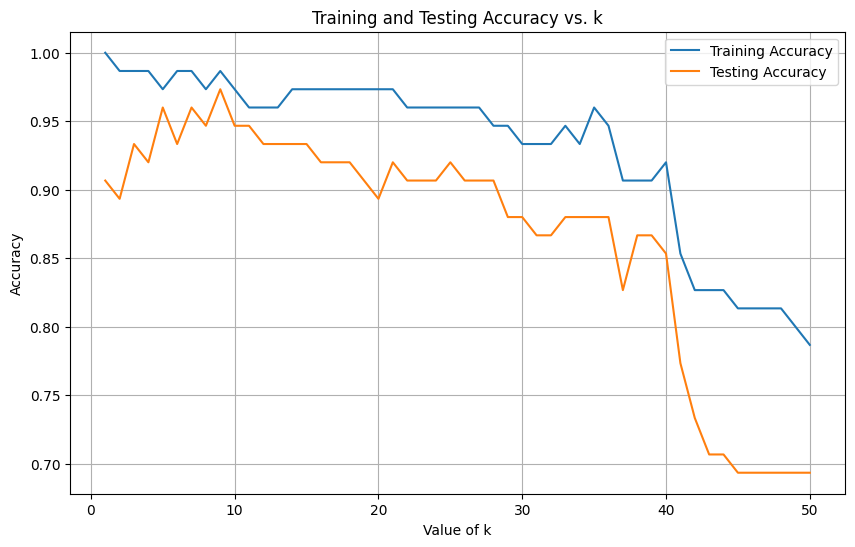

In [13]:
# Plot training and testing accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 51), train_accuracy, label="Training Accuracy")
plt.plot(range(1, 51), test_accuracy, label="Testing Accuracy")
plt.xlabel("Value of k")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training and Testing Accuracy vs. k")
plt.grid(True)
plt.show()

In [14]:
# Find the best k value with the highest testing accuracy
# Considering that the training accuracy declines as k increases
best_k = np.argmax(test_accuracy) + 1
print("Best value of k:", best_k)

Best value of k: 9


In [15]:
# Use the prediction model to classify
# sepal length, sepal width, petal length, petal width
new_flower = np.array([[3.8, 5.0, 1.2, 4.1]])
predicted_class = knn.predict(new_flower)
predicted_class_name = iris.target_names[predicted_class][0]
print("Predicted class for the observed flower:", predicted_class_name)

Predicted class for the observed flower: setosa
